In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False
        
path = '../dataset/'

In [2]:
# # CSV 파일로 불러오기
# data = pd.read_csv(f'{path}stat_405701.csv', encoding='cp949')
# data

In [3]:
# excel 파일로 불러오기
# 해당 데이터의 값은 연도별 범죄율로 '건수/10만명'의 단위로 구성되어 있습니다.
# 출처 : http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=4057
data = pd.read_excel(f'{path}stat_405701.xlsx')
data

,Unnamed: 0,Unnamed: 1,1976,1977,1978,1979,1980,1981,1982,1983,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전체 형법범죄,NaN,723.0,731.0,735.0,720.0,800.0,935.0,758.0,716.0,...,"1,830","2,014","1,895","1,997","2,069","2,098","2,003","2,054","1,962","1,864"
1,주요 형법범죄,살인,1.6,1.4,1.3,1.2,1.4,1.6,1.4,1.3,...,2.3,2.8,2.5,2.4,2.0,1.9,1.8,1.9,1.8,1.7
2,NaN,강도,3.8,3.3,2.8,3.5,6.2,6.5,5.8,6.3,...,9.8,12.9,8.9,8.1,5.3,4.0,3.2,2.9,2.3,1.9
3,NaN,성폭력(강간 포함),8.6,8.9,8.7,9.6,10.4,11.8,13.5,13.1,...,30.8,32.8,40.2,44.1,42.5,53.4,58.8,60.9,57.3,63.8
4,NaN,폭행,34.1,34.8,31.7,29.3,29.7,33.9,30.3,26.5,...,220.1,234.3,221.1,246.9,255.2,250.9,288.9,316.8,335.8,321.7
5,NaN,절도,265.7,249.1,235.8,219.7,254.5,269.1,288.2,292.3,...,455.1,520.6,540.8,563.8,583.8,576.7,525.7,483.0,397.2,358.3


In [4]:
# 에초에 데이터의 열과 행이 일반적으로 분석하던 프레임과 다르게 역전되었기 때문에 이를 해결한다

data = data.drop(columns={'Unnamed: 0','Unnamed: 1'}).transpose()
data.columns = ['전체형법범죄', '살인', '강도', '성폭력', '폭행', '절도']
data

,전체형법범죄,살인,강도,성폭력,폭행,절도
1976,723.0,1.6,3.8,8.6,34.1,265.7
1977,731.0,1.4,3.3,8.9,34.8,249.1
1978,735.0,1.3,2.8,8.7,31.7,235.8
1979,720.0,1.2,3.5,9.6,29.3,219.7
1980,800.0,1.4,6.2,10.4,29.7,254.5
1981,935.0,1.6,6.5,11.8,33.9,269.1
1982,758.0,1.4,5.8,13.5,30.3,288.2
1983,716.0,1.3,6.3,13.1,26.5,292.3
1984,700.0,1.4,7.0,13.6,24.0,265.8
1985,666.0,1.5,7.7,13.4,20.1,252.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전체형법범죄  42 non-null     object
 1   살인      42 non-null     object
 2   강도      42 non-null     object
 3   성폭력     42 non-null     object
 4   폭행      42 non-null     object
 5   절도      42 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [6]:
# 데이터가 object이므로 선형회귀를 하기에 적합하지 않음
# 따라서 데이터의 타입을 변경해줘야 함 
# 타입 변경에 앞서 object에서 string으로 변환 후 comma (,)를 제거함
data["전체형법범죄"] = data["전체형법범죄"].astype(str)
data["전체형법범죄"] = [x.replace(',','') for x in data["전체형법범죄"]]

data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전체형법범죄  42 non-null     float64
 1   살인      42 non-null     float64
 2   강도      42 non-null     float64
 3   성폭력     42 non-null     float64
 4   폭행      42 non-null     float64
 5   절도      42 non-null     float64
dtypes: float64(6)
memory usage: 2.3+ KB


# 단순회귀분석

## 1. Statsmodel 라이브러리

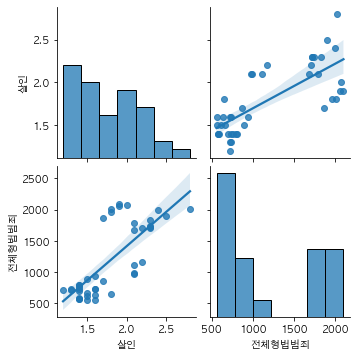

In [7]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[{'전체형법범죄', '살인'}]

# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [8]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = data['전체형법범죄']
feature = data['살인']

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [9]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     53.94
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.24e-09
Time:                        14:15:16   Log-Likelihood:                -307.98
No. Observations:                  42   AIC:                             620.0
Df Residuals:                      40   BIC:                             623.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.8905    275.455     -2.864      0.0

결정계수 R-squared :  0.57422
constant coef(계수)에 대한 p 값 :  0.00663
feature coef(계수)에 대한 p 값 :  0.00000
잔차의 제곱합 MSE :  143850.92920


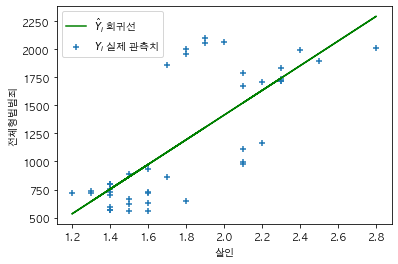

In [28]:
# 통계치 출력
print(f'결정계수 R-squared : {fitted_model.rsquared : .5f}')
print(f'constant coef(계수)에 대한 p 값 : {fitted_model.pvalues[0] : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {fitted_model.pvalues[1] : .5f}')
print(f'잔차의 제곱합 MSE : {fitted_model.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = fitted_model.predict()

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred1, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.legend()
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.show()

## 2. Sklearn 라이브러리

In [11]:
# sklearn을 활용한 선형회귀선 도출
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(feature_add, target)

target_pred2 = model2.predict(feature_add)


결정계수 R-squared :  0.57422
constant coef(계수): -788.89053
feature coef(계수) :  1101.21223


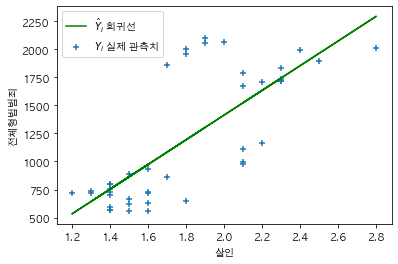

In [27]:
print(f'결정계수 R-squared : {model2.score(feature_add, target) : .5f}')
print(f'constant coef(계수): {model2.intercept_ : .5f}')
print(f'feature coef(계수) : {model2.coef_[1] : .5f}')

plt.scatter(feature, target, marker='+', label='$Y_i$ 실제 관측치')
plt.plot(feature, target_pred2, color = 'g', label='$\hat{Y}_i$ 회귀선')
plt.legend()
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.show()

## 3. Scipy 라이브러리

In [13]:
from scipy.stats import linregress

model = linregress(feature, target)

print(f"R-squared : {model.rvalue ** 2 : .5f}")
print(f'constant coef(계수) : {model.intercept : .5f}')
print(f'feature coef(계수) : {model.slope : .5f}')
print(f'feature coef(계수)의 p-value : {model.pvalue : .5f}')

R-squared :  0.57422
constant coef(계수) : -788.89053
feature coef(계수) :  1101.21223
feature coef(계수)의 p-value :  0.00000


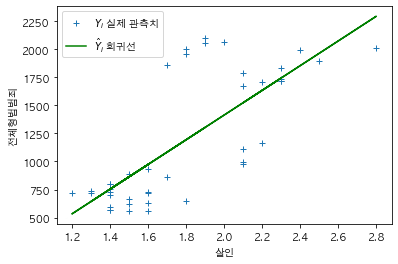

In [26]:
plt.plot(feature, target, '+', label='$Y_i$ 실제 관측치')
plt.plot(feature, model.intercept + model.slope * feature, 'g', label='$\hat{Y}_i$ 회귀선')
plt.xlabel('살인')
plt.ylabel('전체형법범죄')
plt.legend()
plt.show()